<a href="https://colab.research.google.com/github/yashj1301/Python3-UpGrad-UMich/blob/master/Python%203.x/Upgrad/Projects/Project%202%20-%20Virat%20Kohli%20Performance%20Analysis/Virat%20Kohli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyzing Virat Kohli's Overall Performance

In this project, we will be analyzing Virat Kohli's performance from his debut to the very recent match - 3rd T20I against Australia. Let us import the necessary libraries first.

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as cb
import warnings as wr

wr.filterwarnings('ignore')

### Importing Libraries to extract data from ESPN CricInfo Website

In [ ]:
!pip install html-table-parser-python3
import urllib.request
from pprint import pprint
from html_table_parser.parser import HTMLTableParser

Now, we will be using the __`HTMLTableParser`__ module to extract the data from the cricinfo website - https://stats.espncricinfo.com/ci/engine/player/253802.html?class=11;template=results;type=batting;view=innings . Let us go ahead.

### Extracting Data

In [3]:
# Opens a website and read its binary contents (HTTP Response Body)

def url_get_contents(url):

    #making request to the website
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)

    #reading contents of the website
    return f.read()

In [4]:
xhtml = url_get_contents('https://stats.espncricinfo.com/ci/engine/player/253802.html?class=11;template=results;type=batting;view=innings').decode('utf-8')
 
# Defining the HTMLTableParser object
p = HTMLTableParser()
p.feed(xhtml)
 
# converting the parsed data to
# dataframe
virat = pd.DataFrame(p.tables[3])
virat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date,
1,12,33,22,1,0,54.54,2,lbw,1,,ODI v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742
2,37,82,67,6,0,55.22,2,caught,2,,ODI v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745
3,25,40,38,4,0,65.78,1,run out,1,,ODI v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750
4,54,87,66,7,0,81.81,1,bowled,1,,ODI v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755


We have extracted the data. Now, it is time to get going. We will perform the data cleaning first. 

### Preparing the DataFrame

Now, we will be preparing our dataframe. Our first order of business is to modify the metadata of the dataframe. Let us see.

#### Renaming Columns

First, we will rename the columns, and remove the row containing the names of the columns. Let us do that. 

In [5]:
virat.columns=virat.loc[0].values
virat.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date,
0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date,
1,12,33,22,1,0,54.54,2,lbw,1,,ODI v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742
2,37,82,67,6,0,55.22,2,caught,2,,ODI v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745
3,25,40,38,4,0,65.78,1,run out,1,,ODI v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750
4,54,87,66,7,0,81.81,1,bowled,1,,ODI v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755


#### Removing unnecessary rows and columns

Now, we will remove the first row, and last column. Let us see. 

In [6]:
virat = virat.iloc[1:,:-1]
virat.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date
1,12,33,22,1,0,54.54,2,lbw,1,,ODI v Sri Lanka,Dambulla,18 Aug 2008
2,37,82,67,6,0,55.22,2,caught,2,,ODI v Sri Lanka,Dambulla,20 Aug 2008
3,25,40,38,4,0,65.78,1,run out,1,,ODI v Sri Lanka,Colombo (RPS),24 Aug 2008
4,54,87,66,7,0,81.81,1,bowled,1,,ODI v Sri Lanka,Colombo (RPS),27 Aug 2008
5,31,45,46,3,1,67.39,1,lbw,2,,ODI v Sri Lanka,Colombo (RPS),29 Aug 2008


Now, our dataframe is ready for inspection. let us inspect the dataframe. Let us do that.

In [ ]:
virat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 1 to 548
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        548 non-null    object
 1   Mins        548 non-null    object
 2   BF          548 non-null    object
 3   4s          548 non-null    object
 4   6s          548 non-null    object
 5   SR          548 non-null    object
 6   Pos         548 non-null    object
 7   Dismissal   548 non-null    object
 8   Inns        548 non-null    object
 9               548 non-null    object
 10  Opposition  548 non-null    object
 11  Ground      548 non-null    object
 12  Start Date  548 non-null    object
dtypes: object(13)
memory usage: 55.8+ KB


In [ ]:
orig = virat.shape
orig

(548, 13)

Now, we can proceed towards cleaning the dataframe. Let us start.

### Cleaning the Data

We can clearly see that our dataframe has an additional column. Let us see what it is. 

In [7]:
virat[virat.columns[9]]

1       
2       
3       
4       
5       
      ..
545     
546     
547     
548     
549     
Name: , Length: 549, dtype: object

The column has blank values, hence we need to remove it. Let us do that. 

In [8]:
virat.drop('',axis=1,inplace=True)
virat.columns

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date'],
      dtype='object')

In [9]:
virat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 1 to 549
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        549 non-null    object
 1   Mins        549 non-null    object
 2   BF          549 non-null    object
 3   4s          549 non-null    object
 4   6s          549 non-null    object
 5   SR          549 non-null    object
 6   Pos         549 non-null    object
 7   Dismissal   549 non-null    object
 8   Inns        549 non-null    object
 9   Opposition  549 non-null    object
 10  Ground      549 non-null    object
 11  Start Date  549 non-null    object
dtypes: object(12)
memory usage: 51.6+ KB


Now, let us change the data types for each column. We have `7 numerical columns - runs, mins, bf, 4s, 6s, pos,inns` - and `one float column - SR`. Let us change them now.

In [10]:
numeric = ['Runs','Mins','BF','4s','6s','Pos','Inns']
decimal = 'SR'

#### Numeric Columns

In [11]:
virat[numeric].astype(int)

ValueError: ignored

Hence, the `Runs` column contains values with * (which means not out). But, we also have a `dismissal` column. Let us see if it contains a parameter depicting not out or not. 

In [12]:
virat['Dismissal'].value_counts()

caught        320
not out        76
lbw            52
bowled         50
-              24
run out        20
stumped         5
hit wicket      2
Name: Dismissal, dtype: int64

It does have a parameter that says not out. So, we can safely remove the * from its values. But, we also have values where he did not bat or team did not bat. Hence, let us inspect this column first.

In [13]:
virat['Runs'].unique()

array(['12', '37', '25', '54', '31', '2*', '16', 'TDNB', '79*', '30',
       '10', '27', '107', '9', '91', '71*', '102*', '2', 'DNB', '57', '0',
       '82', '18', '68', '26*', '11', '28', '8', '118', '105', '64',
       '63*', '22', '87*', '100*', '34', '1', '59', '24', '35', '14',
       '81', '94', '4', '15', '55', '7', '112*', '86*', '52', '63', '3',
       '117', '20', '23*', '80', '23', '44', '75', '116', '77', '66',
       '21', '133*', '108', '183', '106', '38', '128*', '58', '103',
       '51*', '70', '50', '40', '78*', '19', '14*', '6', '77*', '26',
       '67*', '41', '22*', '58*', '43', '102', '115', '68*', '29', '61',
       '115*', '86', '99', '119', '96', '46', '123', '78', '67', '105*',
       '136', '48', '5', '36*', '57*', '72*', '39', '1*', '13', '62',
       '127', '49', '53', '139*', '141', '169', '147', '3*', '33*', '33',
       '44*', '138', '88', '90*', '59*', '56*', '41*', '55*', '82*',
       '89*', '200', '45', '211', '17', '85*', '154*', '65', '49*', '167',


Hence, we do not need the entries where he did not bat. Let us remove those entries.

In [14]:
virat = virat[virat['Runs'].isin(['DNB','TDNB'])==False]
virat[virat['Runs'].isin(['DNB','TDNB'])]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date


Great ! Let us see how many entries we are left with.

In [15]:
virat.shape

(525, 12)

We have lost 24 entries. Now, let us change the data types now. 

In [16]:
virat[numeric].dtypes

Runs    object
Mins    object
BF      object
4s      object
6s      object
Pos     object
Inns    object
dtype: object

In [17]:
virat['Runs']=virat['Runs'].str.strip('*').astype(int)
virat['Runs'].dtype

dtype('int64')

Great. Now, let us inspect each numerical column for inconsistencies. 

In [18]:
virat['Mins'].unique()

array(['33', '82', '40', '87', '45', '6', '28', '121', '53', '32', '20',
       '93', '-', '19', '136', '98', '128', '3', '125', '123', '30', '35',
       '31', '13', '57', '5', '22', '193', '162', '78', '83', '10', '122',
       '43', '51', '126', '11', '113', '12', '16', '2', '38', '69', '15',
       '118', '1', '68', '135', '72', '62', '92', '9', '18', '102', '70',
       '134', '42', '21', '154', '99', '50', '107', '191', '237', '96',
       '29', '156', '41', '44', '116', '36', '133', '148', '211', '158',
       '80', '187', '65', '143', '284', '130', '67', '60', '61', '17',
       '86', '356', '25', '110', '266', '119', '157', '76', '46', '66',
       '120', '8', '26', '104', '4', '159', '7', '257', '254', '114',
       '179', '88', '27', '14', '129', '131', '195', '23', '75', '39',
       '77', '34', '54', '124', '164', '109', '192', '267', '279', '380',
       '315', '24', '168', '106', '49', '64', '71', '55', '178', '58',
       '155', '202', '73', '74', '259', '84', '174', '8

We can see that for the `Mins` column, we have an inconsistent value `-`, which means data unavailable. Let us replace this with the value `0`. Later, we will create a dictionary in which we will explain which value represents what. 

In [19]:
virat['Mins']=virat['Mins'].replace('-','0')
virat['Mins'].unique()

array(['33', '82', '40', '87', '45', '6', '28', '121', '53', '32', '20',
       '93', '0', '19', '136', '98', '128', '3', '125', '123', '30', '35',
       '31', '13', '57', '5', '22', '193', '162', '78', '83', '10', '122',
       '43', '51', '126', '11', '113', '12', '16', '2', '38', '69', '15',
       '118', '1', '68', '135', '72', '62', '92', '9', '18', '102', '70',
       '134', '42', '21', '154', '99', '50', '107', '191', '237', '96',
       '29', '156', '41', '44', '116', '36', '133', '148', '211', '158',
       '80', '187', '65', '143', '284', '130', '67', '60', '61', '17',
       '86', '356', '25', '110', '266', '119', '157', '76', '46', '66',
       '120', '8', '26', '104', '4', '159', '7', '257', '254', '114',
       '179', '88', '27', '14', '129', '131', '195', '23', '75', '39',
       '77', '34', '54', '124', '164', '109', '192', '267', '279', '380',
       '315', '24', '168', '106', '49', '64', '71', '55', '178', '58',
       '155', '202', '73', '74', '259', '84', '174', '8

Perfect ! Now, let us change the data types of all the remaining columns. 

In [20]:
virat[numeric[1:]]=virat[numeric[1:]].astype(int)
virat[numeric].dtypes

Runs    int64
Mins    int64
BF      int64
4s      int64
6s      int64
Pos     int64
Inns    int64
dtype: object

Perfect ! Now, let us change the `SR` column to a `float` data type. 

In [21]:
virat['SR'].unique()

array(['54.54', '55.22', '65.78', '81.81', '67.39', '100.00', '66.66',
       '75.96', '73.17', '62.50', '142.10', '83.07', '93.85', '75.00',
       '89.21', '104.41', '107.36', '25.00', '80.28', '-', '89.13',
       '62.06', '71.57', '123.80', '50.00', '71.42', '82.35', '0.00',
       '64.91', '97.52', '100.96', '87.67', '90.00', '147.36', '77.14',
       '64.70', '68.29', '94.56', '33.33', '120.48', '160.00', '64.15',
       '60.00', '77.63', '72.72', '42.85', '116.66', '78.64', '90.38',
       '40.00', '27.77', '25.23', '56.60', '80.00', '75.34', '38.88',
       '44.44', '115.05', '58.73', '114.28', '86.86', '93.75', '46.84',
       '55.26', '95.12', '209.09', '94.11', '52.38', '56.09', '37.50',
       '54.32', '55.14', '54.46', '35.48', '104.76', '129.16', '91.17',
       '81.91', '64.28', '48.00', '79.51', '77.77', '154.65', '80.48',
       '123.64', '93.80', '20.00', '58.46', '107.56', '65.71', '141.66',
       '54.20', '53.36', '62.19', '170.73', '128.20', '125.00', '115.38',
  

We have an inappropriate value `-` here. Let us see the entries with this value. 

In [22]:
virat[virat['SR']=='-']

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
24,0,3,0,0,0,-,3,run out,1,ODI v Zimbabwe,Bulawayo,28 May 2010


So, this is where Virat scored a diamond duck. Let us replace this value with 0. 

In [23]:
virat['SR']=virat['SR'].replace('-','0').astype(float)
virat['SR'].dtype

dtype('float64')

Perfect. Now, let us check our data types again.

In [24]:
virat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 1 to 549
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        525 non-null    int64  
 1   Mins        525 non-null    int64  
 2   BF          525 non-null    int64  
 3   4s          525 non-null    int64  
 4   6s          525 non-null    int64  
 5   SR          525 non-null    float64
 6   Pos         525 non-null    int64  
 7   Dismissal   525 non-null    object 
 8   Inns        525 non-null    int64  
 9   Opposition  525 non-null    object 
 10  Ground      525 non-null    object 
 11  Start Date  525 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 53.3+ KB


Great. Now, let us see our other columns.

#### String Columns

In [25]:
others = list(set(virat.columns) - set(numeric+[decimal]))
others

['Ground', 'Dismissal', 'Start Date', 'Opposition']

Now, let us inspect each of these columns.

In [26]:
virat['Opposition'].unique()

array(['ODI v Sri Lanka', 'ODI v Pakistan', 'ODI v West Indies',
       'ODI v Australia', 'ODI v Bangladesh', 'ODI v South Africa',
       'ODI v Zimbabwe', 'T20I v Zimbabwe', 'ODI v New Zealand',
       'T20I v South Africa', 'ODI v England', 'ODI v Ireland',
       'ODI v Netherlands', 'T20I v West Indies', 'Test v West Indies',
       'T20I v England', 'Test v Australia', 'T20I v Australia',
       'T20I v Sri Lanka', 'Test v New Zealand', 'T20I v New Zealand',
       'T20I v Afghanistan', 'T20I v Pakistan', 'Test v England',
       'Test v South Africa', 'T20I v Bangladesh', 'ODI v U.A.E.',
       'Test v Bangladesh', 'Test v Sri Lanka', 'T20I v Ireland',
       'ODI v Afghanistan', 'T20I v Scotland', 'T20I v Hong Kong'],
      dtype=object)

We can see that the column contains the opposition name as well as the format. Hence, we can create a new column of Format from this column. Let us do this. 

In [27]:
virat_new = virat.copy()
virat_new.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
1,12,33,22,1,0,54.54,2,lbw,1,ODI v Sri Lanka,Dambulla,18 Aug 2008
2,37,82,67,6,0,55.22,2,caught,2,ODI v Sri Lanka,Dambulla,20 Aug 2008
3,25,40,38,4,0,65.78,1,run out,1,ODI v Sri Lanka,Colombo (RPS),24 Aug 2008
4,54,87,66,7,0,81.81,1,bowled,1,ODI v Sri Lanka,Colombo (RPS),27 Aug 2008
5,31,45,46,3,1,67.39,1,lbw,2,ODI v Sri Lanka,Colombo (RPS),29 Aug 2008


In [28]:
virat_new.insert(5,'Format',virat_new['Opposition'].str.split(' v ',n=1,expand=True)[0])
virat_new['Opposition'] = virat_new['Opposition'].str.split(' v ',n=1,expand=True)[1]
virat_new.head()

,Runs,Mins,BF,4s,6s,Format,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
1,12,33,22,1,0,ODI,54.54,2,lbw,1,Sri Lanka,Dambulla,18 Aug 2008
2,37,82,67,6,0,ODI,55.22,2,caught,2,Sri Lanka,Dambulla,20 Aug 2008
3,25,40,38,4,0,ODI,65.78,1,run out,1,Sri Lanka,Colombo (RPS),24 Aug 2008
4,54,87,66,7,0,ODI,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),27 Aug 2008
5,31,45,46,3,1,ODI,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),29 Aug 2008


In [29]:
virat_new.Format.value_counts()

ODI     253
Test    173
T20I     99
Name: Format, dtype: int64

Great. We have transformed the column. Now, let us move on to the `Dismissal` column. First, check unique values.

In [30]:
virat_new.Dismissal.unique()

array(['lbw', 'caught', 'run out', 'bowled', 'not out', 'stumped',
       'hit wicket'], dtype=object)

So, this column does not have any errors or anything in the values. Let us examine another column.

In [31]:
virat_new.Ground.unique()

array(['Dambulla', 'Colombo (RPS)', 'Centurion', 'Johannesburg',
       'Vadodara', 'Mohali', 'Rajkot', 'Nagpur', 'Kolkata', 'Mirpur',
       'Jaipur', 'Ahmedabad', 'Bulawayo', 'Harare', 'Visakhapatnam',
       'Guwahati', 'Bengaluru', 'Chennai', 'Durban', 'Cape Town',
       'Gqeberha', 'Delhi', 'Wankhede', 'Port of Spain', 'North Sound',
       'Kingston', 'Bridgetown', 'Roseau', 'Manchester',
       'Chester-le-Street', 'Southampton', 'The Oval', "Lord's",
       'Cardiff', 'Hyderabad (Deccan)', 'Cuttack', 'Indore', 'Melbourne',
       'Sydney', 'Perth', 'Adelaide', 'Brisbane', 'Hobart', 'Hambantota',
       'Pallekele', 'Pune', 'Kochi', 'Ranchi', 'Dharamsala', 'Birmingham',
       'Kanpur', 'Napier', 'Hamilton', 'Auckland', 'Wellington',
       'Fatullah', 'Nottingham', 'Leeds', 'Galle', 'Colombo (PSS)',
       'Colombo (SSC)', 'Canberra', 'Gros Islet', 'Lauderhill',
       'Thiruvananthapuram', 'Dublin (Malahide)', 'Bristol', 'Brabourne',
       'Mount Maunganui', 'Providence', 'C

Great ! So, this column also does not need modifications. Next, let us see the `start date` column.

In [32]:
virat_new['Start Date'].unique()

array(['18 Aug 2008', '20 Aug 2008', '24 Aug 2008', '27 Aug 2008',
       '29 Aug 2008', '14 Sep 2009', '26 Sep 2009', '30 Sep 2009',
       '25 Oct 2009', '2 Nov 2009', '15 Dec 2009', '18 Dec 2009',
       '24 Dec 2009', '5 Jan 2010', '7 Jan 2010', '10 Jan 2010',
       '11 Jan 2010', '13 Jan 2010', '21 Feb 2010', '27 Feb 2010',
       '28 May 2010', '30 May 2010', '3 Jun 2010', '5 Jun 2010',
       '12 Jun 2010', '16 Jun 2010', '19 Jun 2010', '22 Jun 2010',
       '24 Jun 2010', '16 Aug 2010', '25 Aug 2010', '28 Aug 2010',
       '20 Oct 2010', '28 Nov 2010', '1 Dec 2010', '4 Dec 2010',
       '7 Dec 2010', '10 Dec 2010', '9 Jan 2011', '12 Jan 2011',
       '15 Jan 2011', '18 Jan 2011', '21 Jan 2011', '23 Jan 2011',
       '19 Feb 2011', '27 Feb 2011', '6 Mar 2011', '9 Mar 2011',
       '12 Mar 2011', '20 Mar 2011', '24 Mar 2011', '30 Mar 2011',
       '2 Apr 2011', '4 Jun 2011', '6 Jun 2011', '8 Jun 2011',
       '11 Jun 2011', '13 Jun 2011', '16 Jun 2011', '20 Jun 2011',
       '28

We can clearly see that there are no improper values. Now, let us check for null values. 

#### Checking for Null Values

In [33]:
virat_new.isnull().sum()

Runs          0
Mins          0
BF            0
4s            0
6s            0
Format        0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [34]:
virat_new.isnull().sum(axis=1).max()

0

Hence, we do not have any null values. Now, let us move ahead to our data visualization.

### Data Visualization

Now, it is time for our data visualization. First, let us find out some descriptive statistics for our columns.

In [35]:
virat_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 1 to 549
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        525 non-null    int64  
 1   Mins        525 non-null    int64  
 2   BF          525 non-null    int64  
 3   4s          525 non-null    int64  
 4   6s          525 non-null    int64  
 5   Format      525 non-null    object 
 6   SR          525 non-null    float64
 7   Pos         525 non-null    int64  
 8   Dismissal   525 non-null    object 
 9   Inns        525 non-null    int64  
 10  Opposition  525 non-null    object 
 11  Ground      525 non-null    object 
 12  Start Date  525 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 57.4+ KB


In [36]:
num = ['Runs','Mins','BF','4s','6s','SR']
cat = ['Format','Dismissal','Opposition','Ground']

In [37]:
round(virat_new[num].describe(),3)

,Runs,Mins,BF,4s,6s,SR
count,525.000,525.000,525.000,525.000,525.000,525.000
mean,45.863,72.044,57.992,4.558,0.490,77.333
std,44.472,83.124,57.936,4.964,1.013,44.623
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,11.000,11.000,17.000,1.000,0.000,48.000
50%,33.000,44.000,41.000,3.000,0.000,72.720
75%,70.000,109.000,83.000,7.000,1.000,102.290
max,254.000,536.000,366.000,33.000,7.000,241.370


We can clearly see how many statistics are the way we hear on TV. Virat has averaged over 45 in his entire career, if we take the not out innings into consideration. 

Now, let us learn about the categorical columns.

In [38]:
round(virat_new[cat].describe(),3)

,Format,Dismissal,Opposition,Ground
count,525,525,525,525
unique,3,7,15,73
top,ODI,caught,England,Mirpur
freq,253,320,104,23


We can see that he has played the most in ODI's , and has been caught out most times. He has played the most matches against England. Now, let us create some pivot tables.

#### 1. Number of innings played in each format

In [39]:
virat_new.pivot_table(index='Format',values='Runs',aggfunc=np.size)

,Runs
Format,
ODI,253
T20I,99
Test,173


#### 2. Average in each Format

In [40]:
x = virat_new.copy()
x['Dismissal'].value_counts()

caught        320
not out        76
lbw            52
bowled         50
run out        20
stumped         5
hit wicket      2
Name: Dismissal, dtype: int64

Note that for calculating average, we need to consider only the innings where he got out. We can see that he has been not out 76 times, and hence, these entries don't have to be considered. 

In [41]:
x['Dismissal'].replace('not out',np.nan,inplace=True)
x['Dismissal'].value_counts()

caught        320
lbw            52
bowled         50
run out        20
stumped         5
hit wicket      2
Name: Dismissal, dtype: int64

Now, we will use the `groupby()` function to calculate the average across Formats, and use the `count()` function to return only non-null number of innings.

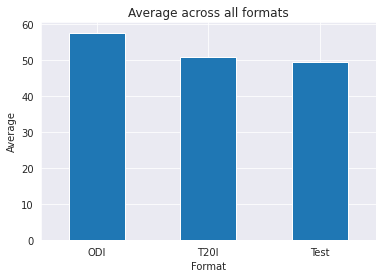

In [42]:
runs = x.groupby('Format')[['Runs']].sum()
inns = x.groupby('Format')[['Dismissal']].count()

average = pd.concat([runs,inns],axis=1)
average['average'] = round(average['Runs']/average['Dismissal'],3)
cb.set_style('darkgrid')
average['average'].plot(kind='bar',title='Average across all formats')
plot.ylabel('Average')
plot.xticks(rotation=0)
plot.show()

#### 3. Time Series Analysis for Runs scored and Average in each Format

Now, we will conduct a time series analysis, where we will see how his performance has gone throughout his career. First, we will look towards his runs scored, and then towards his average. Let us see. 

In [43]:
x['Year']= x['Start Date'].str.rsplit(' ',n=2,expand=True)[2]
x.head()

,Runs,Mins,BF,4s,6s,Format,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Year
1,12,33,22,1,0,ODI,54.54,2,lbw,1,Sri Lanka,Dambulla,18 Aug 2008,2008
2,37,82,67,6,0,ODI,55.22,2,caught,2,Sri Lanka,Dambulla,20 Aug 2008,2008
3,25,40,38,4,0,ODI,65.78,1,run out,1,Sri Lanka,Colombo (RPS),24 Aug 2008,2008
4,54,87,66,7,0,ODI,81.81,1,bowled,1,Sri Lanka,Colombo (RPS),27 Aug 2008,2008
5,31,45,46,3,1,ODI,67.39,1,lbw,2,Sri Lanka,Colombo (RPS),29 Aug 2008,2008


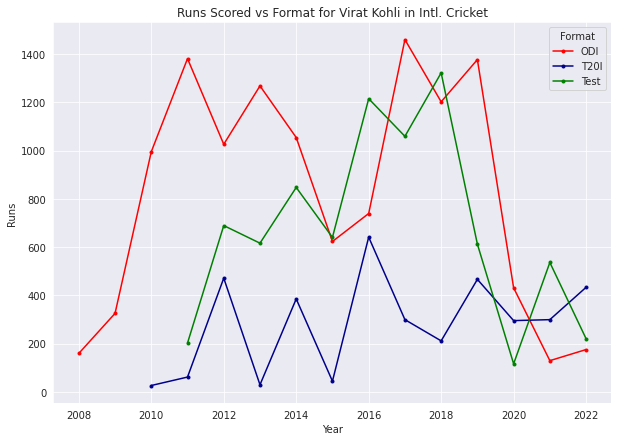

In [44]:
x.pivot_table(index='Year',columns='Format',values='Runs',aggfunc=np.sum).plot(
    marker='.',color=['red','darkblue','green'], title='Runs Scored vs Format for Virat Kohli in Intl. Cricket',
    figsize=(10,7),ylabel='Runs')
plot.show()

We can clearly see how he peaked from 2012 to 2016, which was his greatest year in all formats, and then after 2019, he experienced a slump. Let us look at the averages now.

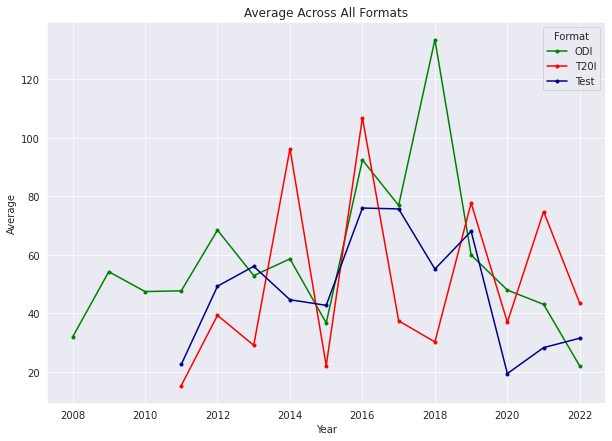

In [45]:
runs = x.pivot_table(index='Year',columns='Format',values='Runs',aggfunc=np.sum)
inns = x.pivot_table(index='Year',columns='Format',values='Dismissal',aggfunc=lambda x:x.count())

round(runs/inns,3).plot(figsize=(10,7),title='Average Across All Formats',ylabel='Average',color=['green','red','darkblue'], marker='.')
plot.show()

Similar story can be seen here as well. His averages were at peak during 2012-2016, but slumped down after 2019. 

#### 4. Distribution of Runs scored

Now, let us look at some advanced plots. We will be creating a KDE (kernel density estimation) graph to analyze the distribution of the runs scored by Virat Kohli. Let us see. 

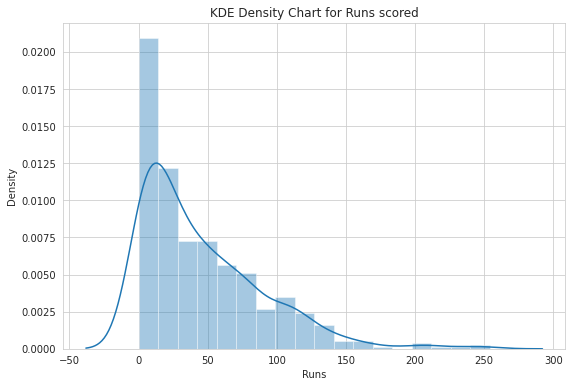

In [46]:
cb.set_style('whitegrid')
plot.subplots(figsize=(9,6))
cb.distplot(x['Runs'],norm_hist=False)
plot.title('KDE Density Chart for Runs scored')
plot.show()

It is clearly visible how skewed the chart is towards the left. It peaks at a value between 0 and 50, which is justified, since he has scored 125 50s and 71 100s in 448 innings. 

#### 5. Percentage of Runs scored in each format against various oppositions

Now, we will create a stacked bar chart showing how much he has scored against various oppositions in all the 3 formats relatively. Let us see.

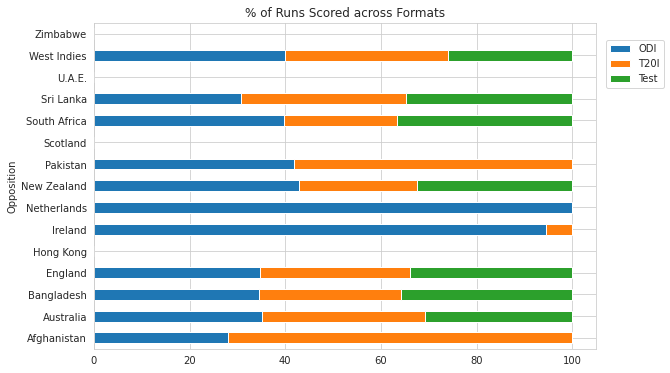

In [47]:
runs = x.pivot_table(index='Opposition',columns='Format',values='Runs',aggfunc=np.sum)
inns = x.pivot_table(index='Opposition',columns='Format',values='Dismissal',aggfunc=lambda x:x.count())

average=round(runs/inns,3)
(average.apply(lambda x:x/x.sum(),axis=1)*100).plot(kind='barh',stacked=True,figsize=(9,6),title='% of Runs Scored across Formats')
plot.legend(loc=(1.02,0.8))
plot.show()

It is clearly visible that he hasn't scored much against Zimbabwe, Scotland, UAE and Hong Kong. It is also surprising that he hasn't played a test match against Pakistan in his whole career !

#### 6. Correlation between Runs scored and Minutes stayed at the crease

Now, let us see how some numeric variables connect to each other. We will see how does runs scored correlate to the minutes spent at crease. Let us see.

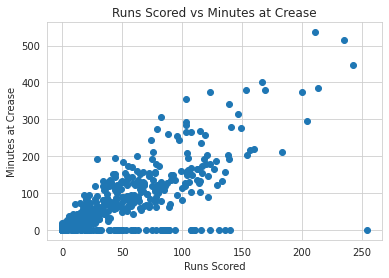

In [48]:
plot.title('Runs Scored vs Minutes at Crease')
plot.scatter(x='Runs',y='Mins',data=x)
plot.xlabel('Runs Scored')
plot.ylabel('Minutes at Crease')
plot.show()

It is clearly visible that the more time he spends on the crease, the higher he scores. Hence, it is important for him to give himself some time in the middle.

#### 7. Correlation between Runs and Balls Faced

Now, we will see how number of balls faced impacts the number of runs scored. Let us see. 

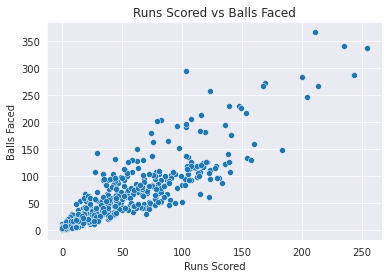

In [49]:
cb.set_style('darkgrid')
plot.title('Runs Scored vs Balls Faced')
cb.scatterplot(x='Runs',y='BF',data=x, estimator=lambda x:np.percentile(x,0.8))
plot.xlabel('Runs Scored')
plot.ylabel('Balls Faced')
plot.show()

Another positive correlation shows that the more balls he faces, the more runs he scores, which is completely logical. 

#### 8. Boxplots showing Distributions of Runs across Positions Batted and Grounds batted at

Now, we will plot some Boxplots showing various data points representing Virat Kohli's score at various positions and various venues. Let us see now.

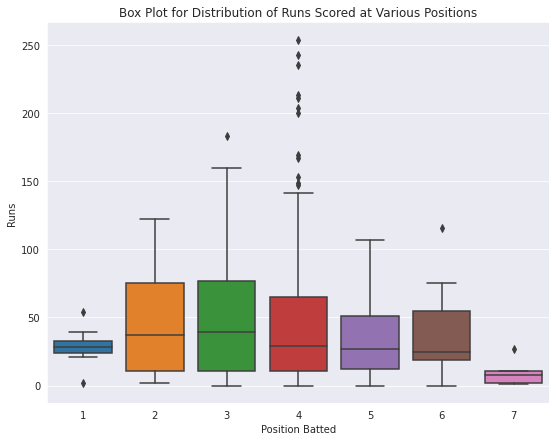

In [50]:
cb.set_style('darkgrid')
plot.subplots(figsize=(9,7))
plot.title('Box Plot for Distribution of Runs Scored at Various Positions')
cb.boxplot(x='Pos',y='Runs',data=x)
plot.xlabel('Position Batted')
plot.show()

It is clearly visible that he has scored most of his runs batting at 2 to 4 positions, and those are the places where he has scored the highest as well. Let us now look at some happy hunting grounds for him. We will analyze the top 5 grounds. 

In [51]:
top5 = x.groupby('Ground')[['Runs']].sum().sort_values(by='Runs',ascending=False)[:5].index
top5

Index(['Mirpur', 'Wankhede', 'Visakhapatnam', 'Adelaide', 'Kolkata'], dtype='object', name='Ground')

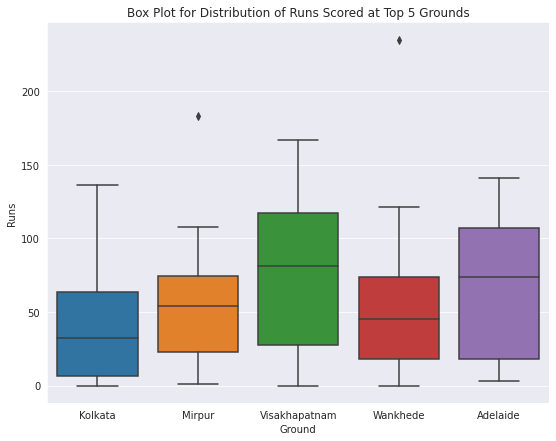

In [52]:
top = x[x['Ground'].isin(top5)]
cb.set_style('darkgrid')
plot.subplots(figsize=(9,7))
plot.title('Box Plot for Distribution of Runs Scored at Top 5 Grounds')
plot.xlabel('Position Batted')
cb.boxplot(x='Ground',y='Runs',data=top)
plot.show()

We can see that although he has scored the most runs in Mirpur (Bangladesh), his happy hunting grounds are Vizag and Adelaide.

#### 9. Number of Half Centuries, Centuries, Double Centuries scored by Virat

In [53]:
half = x[x['Runs'].between(50,99)].shape[0]

In [54]:
full = x[x['Runs']>=100].shape[0]

In [55]:
double = x[x['Runs']>=200].shape[0]

In [56]:
pd.DataFrame({'Half Centuries':half,'Centuries':full,'Double Centuries':double},index=['Number'])

,Half Centuries,Centuries,Double Centuries
Number,125,71,7


In [57]:
piv = x[x['Runs'].between(50,99)]
hc = piv.pivot_table(index='Format',values='Runs',aggfunc=np.size)

piv1 = x[x['Runs']>=100]
fc = piv1.pivot_table(index='Format',values='Runs',aggfunc=np.size)

piv2 = x[x['Runs']>=200]
dc = piv2.pivot_table(index='Format',values='Runs',aggfunc=np.size)

total = pd.concat([hc,fc,dc],axis=1)
total.columns = ['50s','100s','200s']
total.fillna(0,inplace=True)
total['200s']=total['200s'].astype(int)
total

,50s,100s,200s
Format,,,
ODI,64,43,0
T20I,33,1,0
Test,28,27,7


## A Modern Day Legend after all ! Have a good day !

<img src="https://c.ndtvimg.com/2022-09/r0rhv8m_virat-kohli-afp_625x300_08_September_22.jpg?im=FeatureCrop,algorithm=dnn,width=806,height=605">